In [1]:
#import stuff
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#let's upload info for two months (from different seasons) of LSOAS, and the income of those LSOAS
#Lower Layer Super Output Areas (LSOA) are a geographic hierarchy designed to improve the reporting of small area statistics in England and Wales. (https://datadictionary.nhs.uk/nhs_business_definitions/lower_layer_super_output_area.html#:~:text=Lower%20Layer%20Super%20Output%20Areas,statistics%20in%20England%20and%20Wales.)
apr_lsoa_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/London Groceries/Apr_lsoa_grocery.csv',)
sep_lsoa_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/London Groceries/Sep_lsoa_grocery.csv')
income_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/London Groceries/modelled-household-income-estimates-lsoa.csv',encoding= 'unicode_escape')

In [4]:
income_df.head()

Code                 Name   LAD code         Borough Mean 2001/02  \
0  E01000001  City of London 001A  E09000001  City of London      £70,480   
1  E01000002  City of London 001B  E09000001  City of London      £69,250   
2  E01000003  City of London 001C  E09000001  City of London      £54,030   
3  E01000005  City of London 001E  E09000001  City of London      £46,340   
4  E01032739  City of London 001F  E09000001  City of London      £68,780   

  Mean 2002/03 Mean 2003/04 Mean 2004/05 Mean 2005/06 Mean 2006/07  ...  \
0      £71,790      £75,340      £80,300      £81,980      £87,310  ...   
1      £70,790      £74,560      £79,740      £81,680      £87,280  ...   
2      £55,240      £58,190      £62,270      £63,830      £68,260  ...   
3      £47,280      £49,720      £53,120      £54,390      £58,110  ...   
4      £69,790      £72,970      £77,490      £78,830      £83,680  ...   

  Median 2003/04 Median 2004/05 Median 2005/06 Median 2006/07 Median 2007/08  \
0        £48,110        £51,150        £51,410        £54,540        £56,250   
1        £47,700        £50,860        £51,250        £54,520        £56,380   
2        £38,590        £41,180        £41,540        £44,230        £45,800   
3        £33,410        £35,610        £35,900        £38,200        £39,540   
4        £46,860        £49,670        £49,770        £52,650        £54,160   

  Median 2008/09 Median 2009/10 Median 2010/11 Median 2011/12 Median 2012/13  
0        £58,110        £60,720        £62,420        £65,520        £66,790  
1        £58,390        £61,160        £63,030        £66,300        £67,750  
2        £47,480        £49,800        £51,390        £54,140        £55,390  
3        £40,990        £42,980        £44,360        £46,740        £47,840  
4        £55,800        £58,160        £59,650        £62,460        £63,530  

[5 rows x 28 columns]

In [10]:
#ok, let's join the LSOA grocery data together
pd.concat([apr_lsoa_df,sep_lsoa_df],axis=0)

area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0     E01000001  308.512803         32.4250          150.0          250.0   
1     E01000002  306.657964         40.0000          150.0          250.0   
2     E01000003  313.604474         33.4375          150.0          250.0   
3     E01000005  352.778141         35.0000          150.0          275.0   
4     E01000006  461.566169         30.0000          183.0          335.0   
...         ...         ...             ...            ...            ...   
4205  E01033742  383.356999         35.0000          175.0          300.0   
4206  E01033743  415.186286         37.5000          165.0          340.0   
4207  E01033744  426.793595         40.0000          177.0          335.0   
4208  E01033745  404.091458         40.0000          168.0          320.0   
4209  E01033746  404.498763         35.0000          200.0          335.0   

      weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  \
0             400.0            800.0  264.389116     8.370398   94.898559   
1             400.0            900.0  236.907076     9.246765   82.983220   
2             400.0            900.0  283.339381     9.289735   99.812243   
3             450.0           1000.0  402.007533     8.070489  112.621404   
4             500.0           1500.0  620.722112    24.784190  135.862972   
...             ...              ...         ...          ...         ...   
4205          500.0           1000.0  410.489915     9.646815  101.339521   
4206          500.0           1500.0  479.917891    15.369352   99.054211   
4207          500.0           1500.0  614.163634    13.234627  116.157116   
4208          500.0           1500.0  486.105820    19.651310  118.540928   
4209          500.0           1020.0  423.902593     9.964888  105.334223   

      ...  man_day  population    male  female  age_0_17  age_18_64  age_65+  \
0     ...     1296      1296.0   685.0   611.0     179.0      766.0    351.0   
1     ...      693      1156.0   616.0   540.0     197.0      656.0    303.0   
2     ...     1287      1350.0   713.0   637.0     152.0      850.0    348.0   
3     ...     2052      1121.0   604.0   517.0     294.0      675.0    152.0   
4     ...      466      2040.0  1040.0  1000.0     563.0     1317.0    160.0   
...   ...      ...         ...     ...     ...       ...        ...      ...   
4205  ...     1476      1701.0   902.0   799.0     335.0     1241.0    125.0   
4206  ...      826      2426.0  1225.0  1201.0     844.0     1494.0     88.0   
4207  ...     1572      1900.0   964.0   936.0     549.0     1220.0    131.0   
4208  ...      599      1954.0   961.0   993.0     680.0     1202.0     72.0   
4209  ...      857      1394.0   660.0   734.0     217.0      891.0    286.0   

        avg_age  area_sq_km  people_per_sq_km  
0     48.293981        0.13            9985.0  
1     47.398789        0.23            5061.0  
2     48.360741        0.06           22843.0  
3     35.611954        0.19            5912.0  
4     32.080392        0.15           13915.0  
...         ...         ...               ...  
4205  33.250441        0.13           13532.0  
4206  29.259275        1.00            2423.0  
4207  31.960526        0.15           12952.0  
4208  30.143296        0.56            3465.0  
4209  41.552367        0.13           10976.0  

[8482 rows x 202 columns]

In [21]:
#i will want the averages of the values to make sure it's a bit more representative
apr_lsoa_df = apr_lsoa_df.set_index('area_id')
sep_lsoa_df = sep_lsoa_df.set_index('area_id')
new_groceries = new_groceries.div(2)
new_groceries = (apr_lsoa_df + sep_lsoa_df)

In [29]:
#ok, let's join the income data
income_df['area_id'] = income_df['Code']
income_df.drop(columns=['Code'],inplace=True,axis=1)
income_df = income_df.set_index('area_id')
income_df.head()

Name   LAD code         Borough Mean 2001/02  \
area_id                                                                  
E01000001  City of London 001A  E09000001  City of London      £70,480   
E01000002  City of London 001B  E09000001  City of London      £69,250   
E01000003  City of London 001C  E09000001  City of London      £54,030   
E01000005  City of London 001E  E09000001  City of London      £46,340   
E01032739  City of London 001F  E09000001  City of London      £68,780   

          Mean 2002/03 Mean 2003/04 Mean 2004/05 Mean 2005/06 Mean 2006/07  \
area_id                                                                      
E01000001      £71,790      £75,340      £80,300      £81,980      £87,310   
E01000002      £70,790      £74,560      £79,740      £81,680      £87,280   
E01000003      £55,240      £58,190      £62,270      £63,830      £68,260   
E01000005      £47,280      £49,720      £53,120      £54,390      £58,110   
E01032739      £69,790      £72,970      £77,490      £78,830      £83,680   

          Mean 2007/08  ... Median 2003/04 Median 2004/05 Median 2005/06  \
area_id                 ...                                                
E01000001      £89,010  ...        £48,110        £51,150        £51,410   
E01000002      £89,250  ...        £47,700        £50,860        £51,250   
E01000003      £69,880  ...        £38,590        £41,180        £41,540   
E01000005      £59,450  ...        £33,410        £35,610        £35,900   
E01032739      £85,020  ...        £46,860        £49,670        £49,770   

          Median 2006/07 Median 2007/08 Median 2008/09 Median 2009/10  \
area_id                                                                 
E01000001        £54,540        £56,250        £58,110        £60,720   
E01000002        £54,520        £56,380        £58,390        £61,160   
E01000003        £44,230        £45,800        £47,480        £49,800   
E01000005        £38,200        £39,540        £40,990        £42,980   
E01032739        £52,650        £54,160        £55,800        £58,160   

          Median 2010/11 Median 2011/12 Median 2012/13  
area_id                                                 
E01000001        £62,420        £65,520        £66,790  
E01000002        £63,030        £66,300        £67,750  
E01000003        £51,390        £54,140        £55,390  
E01000005        £44,360        £46,740        £47,840  
E01032739        £59,650        £62,460        £63,530  

[5 rows x 27 columns]

In [31]:
#ok actually joining:
complete_lsoa = new_groceries.join(income_df,'area_id')
complete_lsoa.head()

weight  weight_perc2.5  weight_perc25  weight_perc50  \
area_id                                                               
E01000001  308.145114        32.46250          150.0          245.0   
E01000002  311.382192        40.00000          150.0          250.0   
E01000003  310.398611        34.21875          150.0          250.0   
E01000005  352.697076        38.00000          150.0          282.5   
E01000006  458.002040        32.50000          181.5          332.5   

           weight_perc75  weight_perc97.5  weight_std  weight_ci95  \
area_id                                                              
E01000001          400.0          881.875  299.206550     9.172655   
E01000002          400.0          945.000  244.371546     9.339377   
E01000003          400.0          950.000  263.559868     8.683264   
E01000005          450.0         1000.000  405.956607     8.316269   
E01000006          500.0         1327.300  696.533107    29.045692   

               volume  volume_perc2.5  ...  Median 2003/04  Median 2004/05  \
area_id                                ...                                   
E01000001   96.265655         13.0000  ...         £48,110         £51,150   
E01000002   84.730512         13.5000  ...         £47,700         £50,860   
E01000003   98.322338         16.8500  ...         £38,590         £41,180   
E01000005  116.899666         10.5500  ...         £33,410         £35,610   
E01000006  134.407224         11.4275  ...         £27,700         £29,440   

           Median 2005/06  Median 2006/07  Median 2007/08  Median 2008/09  \
area_id                                                                     
E01000001         £51,410         £54,540         £56,250         £58,110   
E01000002         £51,250         £54,520         £56,380         £58,390   
E01000003         £41,540         £44,230         £45,800         £47,480   
E01000005         £35,900         £38,200         £39,540         £40,990   
E01000006         £29,610         £31,460         £32,500         £33,640   

           Median 2009/10  Median 2010/11  Median 2011/12  Median 2012/13  
area_id                                                                    
E01000001         £60,720         £62,420         £65,520         £66,790  
E01000002         £61,160         £63,030         £66,300         £67,750  
E01000003         £49,800         £51,390         £54,140         £55,390  
E01000005         £42,980         £44,360         £46,740         £47,840  
E01000006         £35,230         £36,300         £38,200         £39,040  

[5 rows x 228 columns]

In [66]:
#is there a correlation between WEIGHT of food and income?
#complete_lsoa.plot('weight','Mean 2012/13') <-- forgot to check what type this data is
#complete_lsoa.info() # <-- so mostly float64 - what about incomes?
dataTypeObj = complete_lsoa.dtypes['Median 2002/03']
print(dataTypeObj)
#ok, they are objects - of course. gotta parse out superfluous info to make them int or float

float64


In [61]:
#complete_lsoa.iloc[:,-24:] = complete_lsoa.iloc[:,-24:].str.lstrip('£')
complete_lsoa.iloc[:,-24:] = complete_lsoa.iloc[:,-24:].applymap(lambda x: x.replace('£', ''))

In [63]:
complete_lsoa.iloc[:,-24:] = complete_lsoa.iloc[:,-24:].applymap(lambda x: x.replace(',', ''))

In [65]:
complete_lsoa.iloc[:,-24:] = complete_lsoa.iloc[:,-24:].astype('float64')

In [64]:
complete_lsoa.iloc[:,-24:]
#neat!

Mean 2001/02 Mean 2002/03 Mean 2003/04 Mean 2004/05 Mean 2005/06  \
area_id                                                                      
E01000001        70480        71790        75340        80300        81980   
E01000002        69250        70790        74560        79740        81680   
E01000003        54030        55240        58190        62270        63830   
E01000005        46340        47280        49720        53120        54390   
E01000006        29610        30060        31490        33540        34250   
...                ...          ...          ...          ...          ...   
E01033742        27360        28350        30290        32890        34220   
E01033743        33630        33890        35220        37210        37680   
E01033744        28340        28750        30100        32050        32720   
E01033745        32590        33030        34520        36660        37320   
E01033746        37280        38130        40230        43120        44300   

          Mean 2006/07 Mean 2007/08 Mean 2008/09 Mean 2009/10 Mean 2010/11  \
area_id                                                                      
E01000001        87310        89010        95560        95730        99460   
E01000002        87280        89250        96120        96580       100630   
E01000003        68260        69880        75340        75790        79080   
E01000005        58110        59450        64060        64420        67210   
E01000006        36520        37290        40110        40270        41950   
...                ...          ...          ...          ...          ...   
E01033742        37130        38550        42130        42940        45350   
E01033743        39820        40300        42970        42770        44150   
E01033744        34870        35600        38280        38420        40000   
E01033745        39650        40320        43200        43180        44770   
E01033746        47480        48710        52630        53060        55470   

           ... Median 2003/04 Median 2004/05 Median 2005/06 Median 2006/07  \
area_id    ...                                                               
E01000001  ...          48110          51150          51410          54540   
E01000002  ...          47700          50860          51250          54520   
E01000003  ...          38590          41180          41540          44230   
E01000005  ...          33410          35610          35900          38200   
E01000006  ...          27700          29440          29610          31460   
...        ...            ...            ...            ...            ...   
E01033742  ...          24300          26340          26980          29150   
E01033743  ...          28130          29670          29600          31180   
E01033744  ...          24150          25660          25800          27400   
E01033745  ...          27600          29260          29340          31050   
E01033746  ...          31770          33960          34320          36620   

          Median 2007/08 Median 2008/09 Median 2009/10 Median 2010/11  \
area_id                                                                 
E01000001          56250          58110          60720          62420   
E01000002          56380          58390          61160          63030   
E01000003          45800          47480          49800          51390   
E01000005          39540          40990          42980          44360   
E01000006          32500          33640          35230          36300   
...                  ...            ...            ...            ...   
E01033742          30620          32170          34170          35690   
E01033743          31950          32790          34050          34790   
E01033744          28300          29280          30660          31580   
E01033745          31960          32950          34360          35260   
E01033746          37990          39460          41460          42860   

          Media

In [110]:
#somehow, the income data set had more LSOAs than did the groceries. gotta drop NaNs
complete_lsoa = complete_lsoa.dropna()

In [111]:
#so anyway,is there a correlation between WEIGHT of food and income?
fat_rich = complete_lsoa[['weight','Mean 2012/13']]

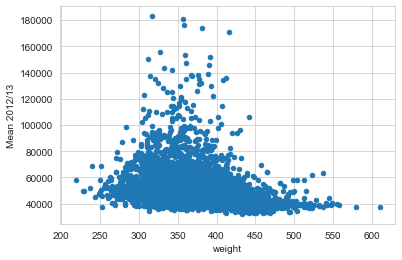

In [112]:
fat_rich.plot('weight','Mean 2012/13',kind='scatter')

In [120]:
#what's the correlation between weight of food and income?
from scipy import stats
x = fat_rich['weight']
y = fat_rich['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #so, a moderately inverse relationship. hmm

-0.3670073902981259

-0.43706849227649286

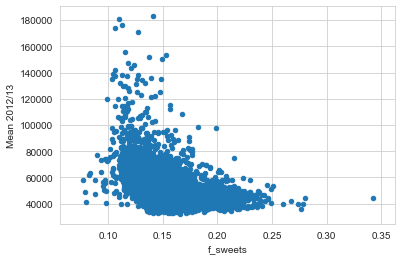

In [122]:
#now let's see by percentage of sweets as portion of all groceries, by income
complete_lsoa.plot('f_sweets','Mean 2012/13',kind='scatter')
x = complete_lsoa['f_sweets']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #so, a moderately inverse relationship

-0.12686916383205704

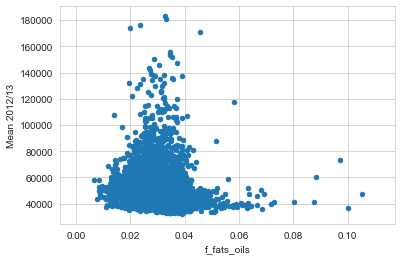

In [123]:
#now let's see by percentage of fats as portion of all groceries, by income
complete_lsoa.plot('f_fats_oils','Mean 2012/13',kind='scatter')
x = complete_lsoa['f_fats_oils']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #not much of a correlation.

0.5009439369348976

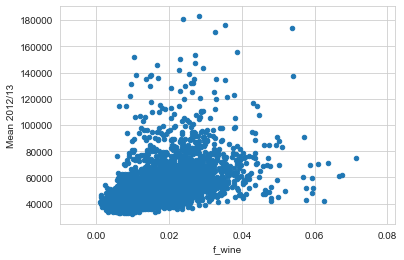

In [124]:
#what about wine as percentage of all groceries? wine is more expensive/luxury, right?
complete_lsoa.plot('f_wine','Mean 2012/13',kind='scatter')
x = complete_lsoa['f_wine']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #a decent correlation!

0.10312332810419121

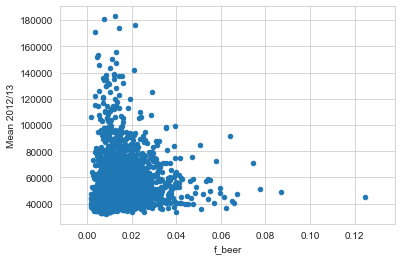

In [125]:
#what about beer? I expect more beer at more poor since it's cheaper
complete_lsoa.plot('f_beer','Mean 2012/13',kind='scatter')
x = complete_lsoa['f_beer']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #nope. no correlation.

-0.45872774785933773

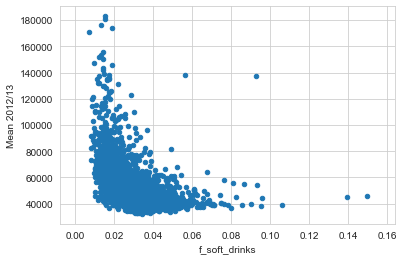

In [127]:
#what about soft drinks? I expect more soft drinks at more poor since they are cheap
complete_lsoa.plot('f_soft_drinks','Mean 2012/13',kind='scatter')
x = complete_lsoa['f_soft_drinks']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #a moderate correlation. poor people drink more soft drinks than do rich people.

-0.39130364455242733

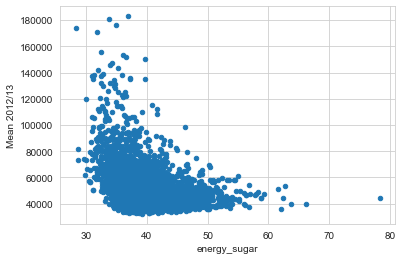

In [131]:
#what about calories from sugar (so, how sugary is the average product, as measured by calories?)
complete_lsoa.plot('energy_sugar','Mean 2012/13',kind='scatter')
x = complete_lsoa['energy_sugar']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #a moderate correlation. poor people eat more sugary things.

-0.20486097277974114

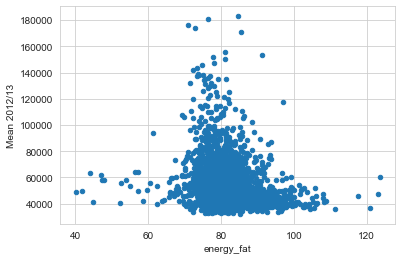

In [145]:
#what about calories from fat (so, how fatty is the average product, as measured by calories?)
complete_lsoa.plot('energy_fat','Mean 2012/13',kind='scatter')
x = complete_lsoa['energy_fat']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #not much.

-0.4437029384583048

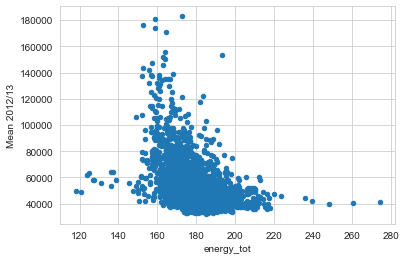

In [144]:
#total caloric value of the average product - I expect poor people to intake more calories
complete_lsoa.plot('energy_tot','Mean 2012/13',kind='scatter')
x = complete_lsoa['energy_tot']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #a moderate correlation. poor people eat products that are higher in caloric value.

0.49727573981058243

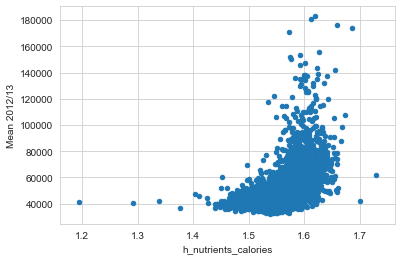

In [139]:
#Shannon entropy of calories amongst nutrients - not exactly sure how this works, but I guess it's like - how varied is your diet
#https://en.wikipedia.org/wiki/Entropy_(information_theory)
complete_lsoa.plot('h_nutrients_calories','Mean 2012/13',kind='scatter')
x = complete_lsoa['h_nutrients_calories']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #a moderate correlation. rich people have more varied diets (by nutrients)

0.37402484375454964

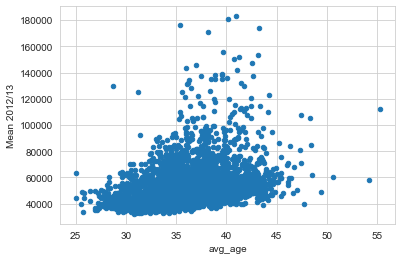

In [142]:
#basic demographics - avg age by ave income
complete_lsoa.plot('avg_age','Mean 2012/13',kind='scatter')
x = complete_lsoa['avg_age']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #actually, what we'd want here is a gaussian distribution

0.03817408077345066

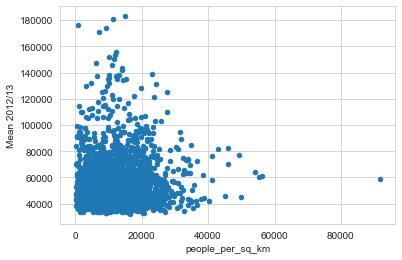

In [143]:
#basic demographics - is there a correlation between pop. density and average income?
complete_lsoa.plot('people_per_sq_km','Mean 2012/13',kind='scatter')
x = complete_lsoa['people_per_sq_km']
y = complete_lsoa['Mean 2012/13']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value #resoundingly no. pretty surprising

In [147]:
#let's visualize LSOA by wealth
import geopandas as geo

In [149]:
#import it
lsoa_geo = geo.read_file(r'C:/Users/douge/Python Notebooks/London Groceries/LSOA_2011_EW_BFC_shp/LSOA_2011_EW_BFC.shp')

In [157]:
#I only want London area LSOAs. Let's figure out which those are...
lsoa_geo.head(20)
#ok. I think the '11CD' is the same as the area ID.

LSOA11NM  \
area_id                        
E01030056   Mid Suffolk 006B   
E01030057   Mid Suffolk 007B   
E01030054   Mid Suffolk 002B   
E01030055   Mid Suffolk 002C   
E01030052   Mid Suffolk 001A   
E01030053   Mid Suffolk 003A   
E01030050   Mid Suffolk 004C   
E01030051   Mid Suffolk 006A   
E01030058   Mid Suffolk 001B   
E01030059   Mid Suffolk 005C   
E01032006     Wiltshire 059B   
E01032087     Wiltshire 031C   
E01032086     Wiltshire 031B   
E01032007     Wiltshire 059C   
E01032085     Wiltshire 031A   
E01032004     Wiltshire 054B   
E01026066  East Lindsey 011C   
E01032084     Wiltshire 037C   
E01032005     Wiltshire 059A   
E01026067  East Lindsey 011D   

                                                    geometry  
area_id                                                       
E01030056  POLYGON ((602565.167 261619.354, 602568.750 26...  
E01030057  POLYGON ((620353.125 257225.999, 620330.690 25...  
E01030054  POLYGON ((607007.190 275966.413, 607006.813 27...  
E01030055  POLYGON ((607480.834 271499.445, 607477.312 27...  
E01030052  POLYGON ((613156.044 274811.514, 613146.313 27...  
E01030053  POLYGON ((624583.176 278641.415, 624577.827 27...  
E01030050  POLYGON ((600032.221 263771.525, 600031.793 26...  
E01030051  POLYGON ((598186.499 263556.250, 598186.259 26...  
E01030058  POLYGON ((618065.375 271535.969, 618065.397 27...  
E01030059  POLYGON ((610246.189 267159.065, 610253.285 26...  
E01032006  POLYGON ((413583.794 128323.236, 413584.579 12...  
E01032087  POLYGON ((385750.761 158473.563, 385744.629 15...  
E01032086  POLYGON ((385053.129 158598.008, 385053.063 15...  
E01032007  POLYGON ((414039.597 128328.258, 414030.930 12...  
E01032085  POLYGON ((384765.171 157600.619, 384764.259 15...  
E01032004  POLYGON ((401370.000 130435.202, 401361.500 13...  
E01026066  POLYGON ((525624.401 370733.189, 525625.000 37...  
E01032084  POLYGON ((387848.688 157202.547, 387879.434 15...  
E01032005  POLYGON ((414748.709 128547.973, 414752.171 12...  
E01026067  POLYGON ((525716.000 369683.000, 525716.035 36...

In [156]:
#let's rename the column and set the index
lsoa_geo.rename(columns={'LSOA11CD':'area_id'},inplace=True)
lsoa_geo.set_index('area_id',inplace=True)

In [173]:
#ok. let's join em'!
complete_lsoa_geo = lsoa_geo.join(complete_lsoa)

In [184]:
complete_lsoa_geo.describe()


weight  weight_perc2.5  weight_perc25  weight_perc50  \
count  3963.000000     3963.000000    3963.000000    3963.000000   
mean    382.927828       36.280111     162.249732     292.464131   
std      49.646752        4.949241      21.120688      37.915099   
min     218.315350       16.000000      67.500000     164.000000   
25%     348.607062       32.681250     150.000000     262.625000   
50%     383.794698       36.250000     162.500000     300.000000   
75%     417.331472       40.000000     177.500000     320.000000   
max     610.849356       75.000000     405.000000     500.000000   

       weight_perc75  weight_perc97.5   weight_std  weight_ci95       volume  \
count    3963.000000      3963.000000  3963.000000  3963.000000  3963.000000   
mean      470.671347      1169.106633   454.371388    16.485461   109.663777   
std        40.017708       271.312032   148.088714     9.309276    15.946703   
min       288.750000       649.750000   190.152372     3.726445    62.874044   
25%       450.000000      1000.000000   352.891817     9.714723    98.467328   
50%       490.000000      1000.000000   423.694344    14.186913   107.830058   
75%       500.000000      1327.500000   527.754630    20.830878   118.819419   
max       650.000000      3250.000000  1386.635924    75.693968   185.021940   

       volume_perc2.5  ...  Median 2003/04  Median 2004/05  Median 2005/06  \
count     3963.000000  ...     3963.000000     3963.000000     3963.000000   
mean        12.630341  ...    28174.080242    29878.642443    29978.872067   
std          3.297443  ...     5200.757699     5544.625771     5585.678798   
min          5.970000  ...    17540.000000    18630.000000    18730.000000   
25%         10.500000  ...    24210.000000    25660.000000    25750.000000   
50%         11.000000  ...    27510.000000    29150.000000    29220.000000   
75%         14.263750  ...    31240.000000    33100.000000    33190.000000   
max         32.900000  ...    54910.000000    58580.000000    59090.000000   

       Median 2006/07  Median 2007/08  Median 2008/09  Median 2009/10  \
count     3963.000000     3963.000000     3963.000000     3963.000000   
mean     31770.179157    32754.160989    33831.408024    35360.489528   
std       5937.595454     6136.337177     6350.961140     6649.999872   
min      19910.000000    20600.000000    21350.000000    22410.000000   
25%      27285.000000    28120.000000    29080.000000    30370.000000   
50%      30920.000000    31840.000000    32850.000000    34320.000000   
75%      35150.000000    36170.000000    37330.000000    38980.000000   
max      63770.000000    67260.000000    70910.000000    75510.000000   

       Median 2010/11  Median 2011/12  Median 2012/13  
count     3963.000000     3963.000000     3963.000000  
mean     36373.075953    38204.622761    38983.272773  
std       6851.840823     7208.971952     7368.990714  
min      22940.000000    23860.000000    24120.000000  
25%      31270.000000    32870.000000    33550.000000  
50%      35300.000000    37050.000000    37740.000000  
75%      40030.000000    41990.000000    42840.000000  
max      79010.000000    84410.000000    88090.000000  

[8 rows x 225 columns]

In [176]:
complete_lsoa_geo = complete_lsoa_geo.dropna(axis=0)

In [185]:
complete_lsoa_geo.head()

LSOA11NM  \
area_id                                
E01000056  Barking and Dagenham 018C   
E01000057  Barking and Dagenham 012A   
E01000054  Barking and Dagenham 018A   
E01000055  Barking and Dagenham 018B   
E01000052  Barking and Dagenham 019D   

                                                    geometry      weight  \
area_id                                                                    
E01000056  POLYGON ((548159.688 183849.000, 548159.688 18...  436.543262   
E01000057  POLYGON ((547657.057 184359.696, 547656.921 18...  454.842077   
E01000054  POLYGON ((548118.932 184237.573, 548119.763 18...  383.349380   
E01000055  POLYGON ((547712.088 184031.898, 547718.365 18...  418.193928   
E01000052  POLYGON ((544930.306 183835.826, 544933.000 18...  427.405147   

           weight_perc2.5  weight_perc25  weight_perc50  weight_perc75  \
area_id                                                                  
E01000056        33.25000         162.00          330.0          500.0   
E01000057        38.69375         194.00          340.0          500.0   
E01000054        37.57500         152.25          297.5          475.0   
E01000055        39.70000         170.00          300.0          500.0   
E01000052        41.50000         188.00          337.5          500.0   

           weight_perc97.5  weight_std  weight_ci95  ...  Median 2003/04  \
area_id                                              ...                   
E01000056           1416.0  559.236544    37.689489  ...         24230.0   
E01000057           2032.5  652.845177    37.510383  ...         23940.0   
E01000054           1000.0  544.730586    31.922481  ...         23910.0   
E01000055           1265.0  524.184021    29.419543  ...         24100.0   
E01000052           1338.5  504.198267    16.299562  ...         24240.0   

           Median 2004/05  Median 2005/06  Median 2006/07  Median 2007/08  \
area_id                                                                     
E01000056         25790.0         25980.0         27640.0         28610.0   
E01000057         25520.0         25750.0         27450.0         28460.0   
E01000054         25550.0         25820.0         27560.0         28620.0   
E01000055         25710.0         25950.0         27670.0         28690.0   
E01000052         25650.0         25690.0         27190.0         28010.0   

           Median 2008/09  Median 2009/10  Median 2010/11  Median 2011/12  \
area_id                                                                     
E01000056         29670.0         31140.0         32150.0         33890.0   
E01000057         29570.0         31080.0         32140.0         33940.0   
E01000054         29770.0         31320.0         32420.0         34260.0   
E01000055         29810.0         31330.0         32400.0         34210.0   
E01000052         28900.0         30180.0         31030.0         32570.0   

           Median 2012/13  
area_id                    
E01000056         34710.0  
E01000057         34810.0  
E01000054         35160.0  
E01000055         35070.0  
E01000052         33220.0  

[5 rows x 230 columns]

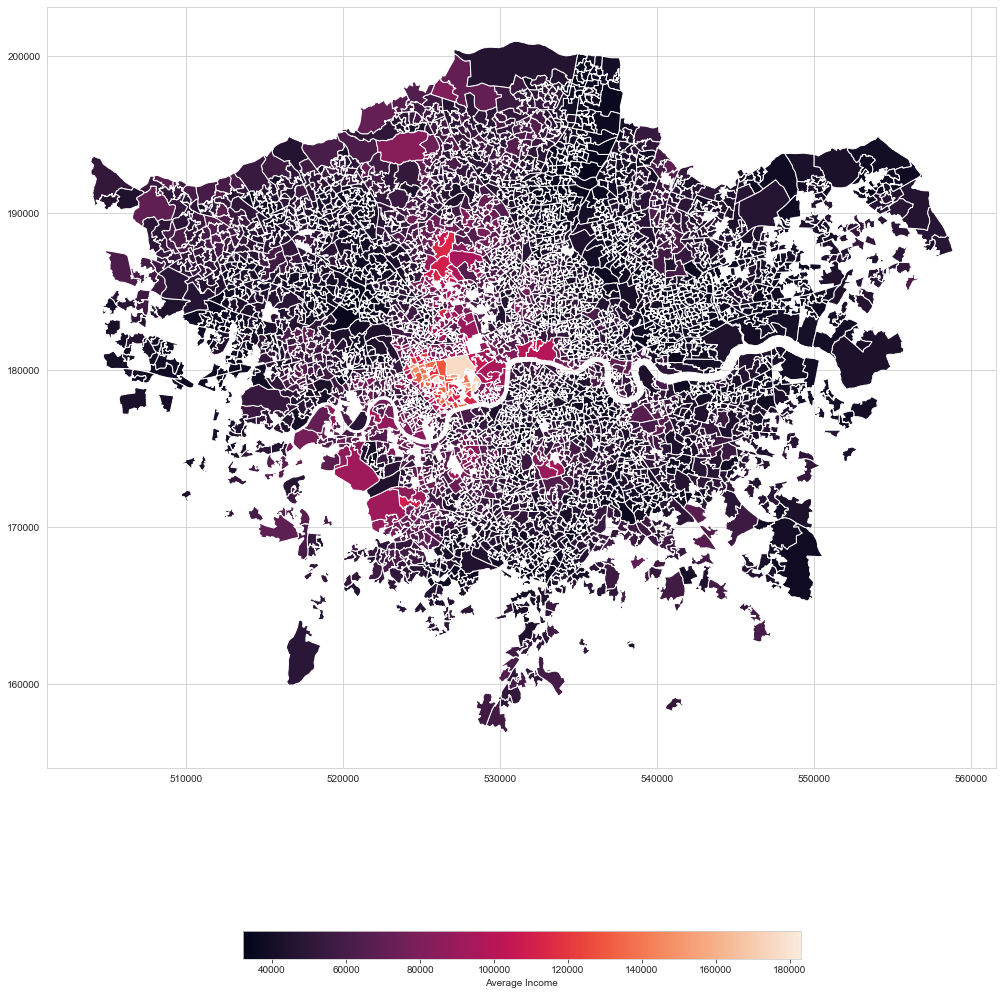

In [194]:
fig, ax = plt.subplots(1, 1,figsize=(20,20))
complete_lsoa_geo.plot(ax=ax, legend=True,column='Mean 2012/13',legend_kwds={'label': "Average Income",'orientation': "horizontal",'shrink': 0.5});

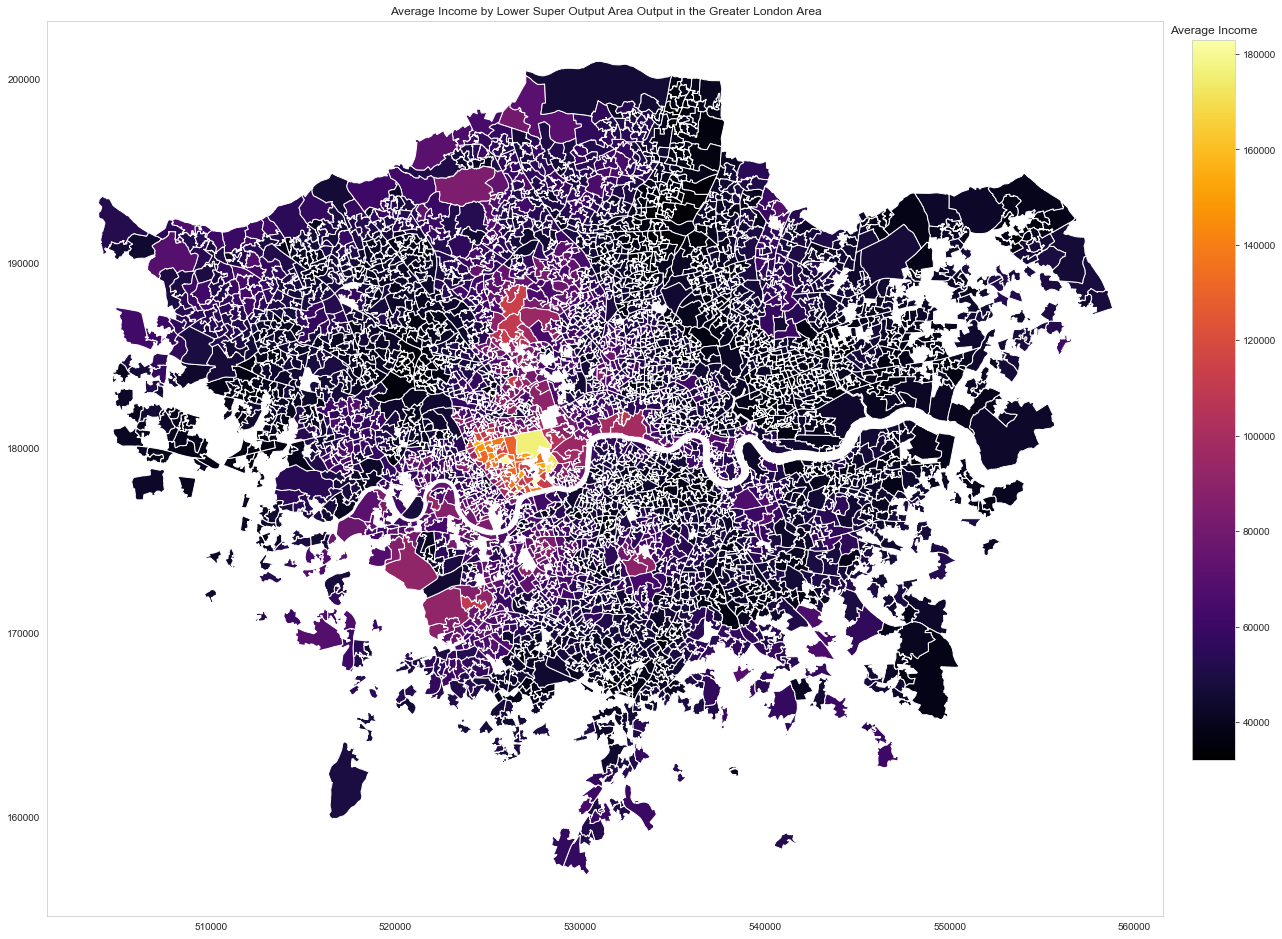

In [213]:
colormap = "inferno"

ax = complete_lsoa_geo.plot(column='Mean 2012/13', cmap=colormap, \
                figsize=[20,20], \
                vmin=min(complete_lsoa_geo['Mean 2012/13']), vmax=max(complete_lsoa_geo['Mean 2012/13']))

# map marginal/face deco
ax.set_title('Average Income by Lower Super Output Area Output in the Greater London Area')
ax.grid() 

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.93, 0.3, 0.03, 0.5])   
cbax.set_title('Average Income')

sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(complete_lsoa_geo['Mean 2012/13']), vmax=max(complete_lsoa_geo['Mean 2012/13'])))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
#sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()

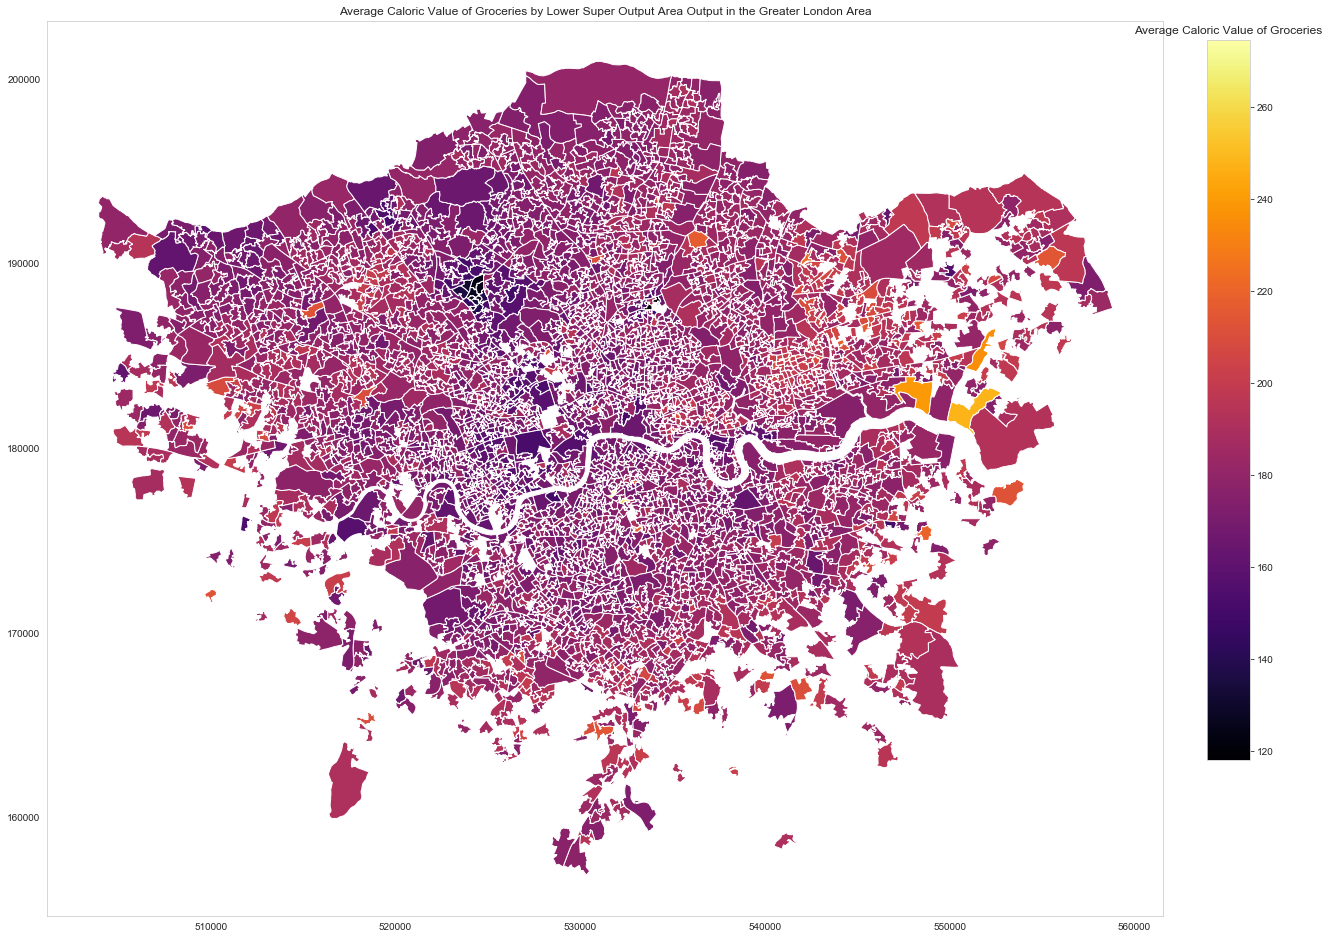

In [215]:
colormap = "inferno"

ax = complete_lsoa_geo.plot(column='energy_tot', cmap=colormap, \
                figsize=[20,20], \
                vmin=min(complete_lsoa_geo['energy_tot']), vmax=max(complete_lsoa_geo['energy_tot']))

# map marginal/face deco
ax.set_title('Average Caloric Value of Groceries by Lower Super Output Area Output in the Greater London Area')
ax.grid() 

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.93, 0.3, 0.03, 0.5])   
cbax.set_title('Average Caloric Value of Groceries')

sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(complete_lsoa_geo['energy_tot']), vmax=max(complete_lsoa_geo['energy_tot'])))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
#sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()

In [220]:
complete_lsoa_geo['wealth_calories_ratio'] = complete_lsoa_geo['Mean 2012/13']/complete_lsoa['energy_tot']

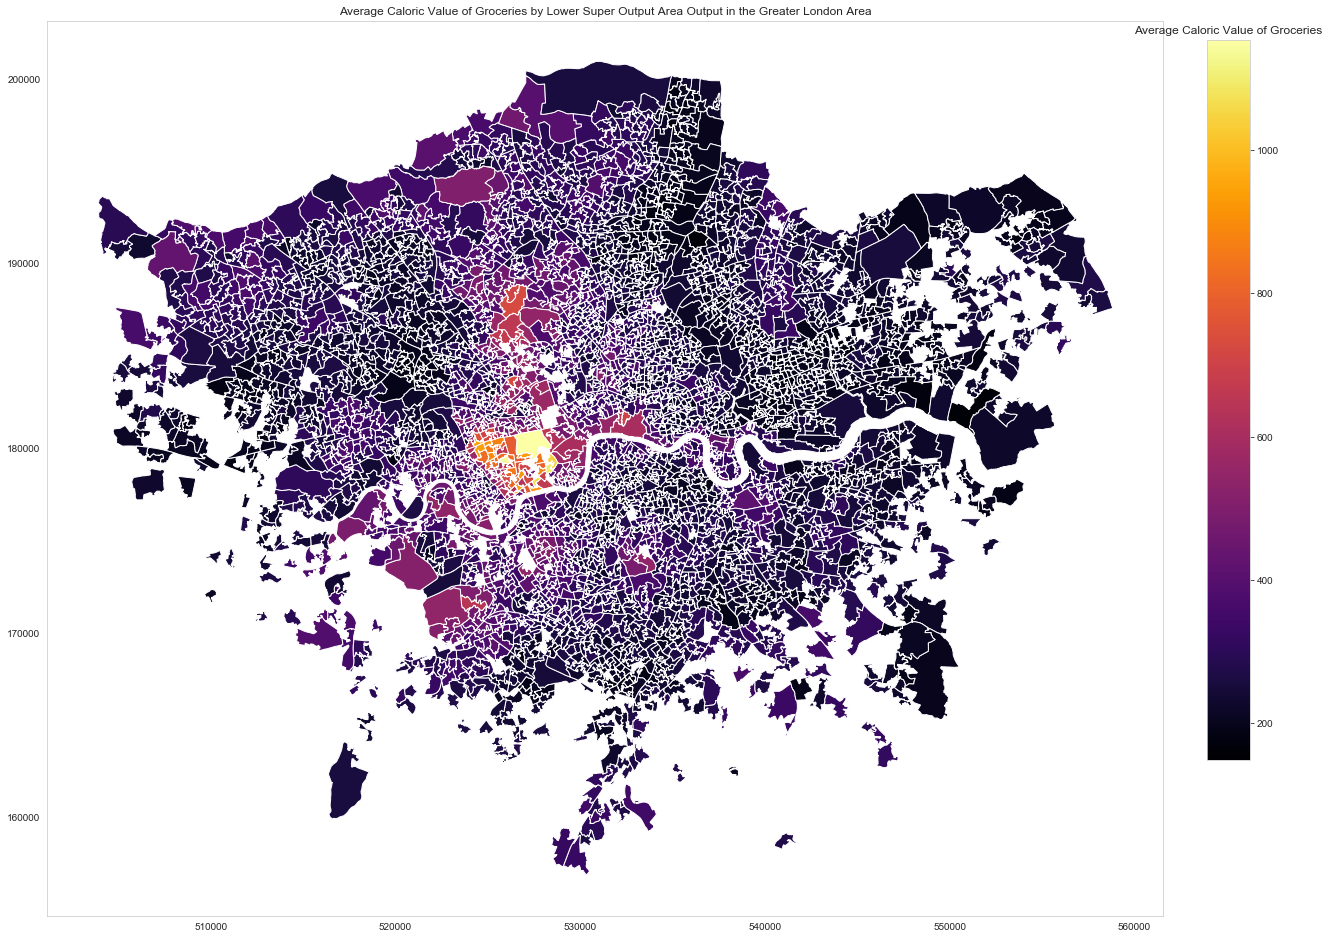

In [221]:
colormap = "inferno"

ax = complete_lsoa_geo.plot(column='wealth_calories_ratio', cmap=colormap, \
                figsize=[20,20], \
                vmin=min(complete_lsoa_geo['wealth_calories_ratio']), vmax=max(complete_lsoa_geo['wealth_calories_ratio']))

# map marginal/face deco
ax.set_title('Average Caloric Value of Groceries by Lower Super Output Area Output in the Greater London Area')
ax.grid() 

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.93, 0.3, 0.03, 0.5])   
cbax.set_title('Average Caloric Value of Groceries')

sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(complete_lsoa_geo['wealth_calories_ratio']), vmax=max(complete_lsoa_geo['wealth_calories_ratio'])))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
#sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()